In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import cv2
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications.resnet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from tensorflow import keras 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import sklearn
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import tensorflow

In [ ]:
img_height, img_width = (224,224)
batch_size = 32

train_data_dir = r"/content/drive/MyDrive/Augmeny_Trial_output.after.splitting/train"
valid_data_dir = r"/content/drive/MyDrive/Augmeny_Trial_output.after.splitting/val"
test_data_dir = r"/content/drive/MyDrive/Augmeny_Trial_output.after.splitting/test"
#test_data_dir = r"/content/drive/MyDrive/outputfolder/test"
#image.open()

In [ ]:

train_datagen = ImageDataGenerator(
                                     shear_range=0.2,zoom_range=0.2,
                                 horizontal_flip=True,
                                   validation_split=0.4,
                                    rescale=1/255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size = batch_size, 
                                                      class_mode='categorical')
                       
                                       #   subset='training')# set as training data

valid_generator = train_datagen.flow_from_directory(valid_data_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size = batch_size, 
                                                    class_mode='categorical')
                                                    #subset='validation') #set as validation data  
                                                                                                       

Found 3074 images belonging to 4 classes.
Found 383 images belonging to 4 classes.


In [ ]:
train_generator.class_indices

{'center': 0, 'closed': 1, 'left': 2, 'right': 3}

In [ ]:
y_train = train_generator.classes
len(y_train)

3074

In [ ]:
nb_validation_samples = 383

In [ ]:
dir(train_generator)
#type(train_generator.labels)
print(train_generator.classes)
#y_train = train_generator.classes
y_train = train_generator.classes
y_train.shape

[0 0 0 ... 3 3 3]


(3074,)

In [ ]:
test_generator = train_datagen.flow_from_directory(test_data_dir,
                                                    target_size=(img_height, img_width),
                                   
                                                   batch_size = 1, 
                                                    class_mode='categorical')
                                                    #subset='validation') #set as testing data

Found 388 images belonging to 4 classes.


In [ ]:
x,y = test_generator.next()
x.shape

(1, 224, 224, 3)

In [ ]:
import math
import numpy as np
import scipy
import h5py
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization  
from tensorflow.keras.layers import Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from matplotlib.pyplot import imshow
def Gaip_model_2b(input_shape, outputClasses):
  
    #X_input = keras.Input(shape=(224, 224, 3))
    X_input = Input(input_shape)
    X = ZeroPadding2D((3, 3))(X_input)
   # X_2 = X
    
    # Stage 0
    #X = Conv2D(16, (3, 3), strides=(1, 1), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
   # X = BatchNormalization(axis=3, name='bn_conv1')(X)
   #X = Activation('relu')(X)
    #X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    
    X_2 = X
    #stage1:
    X = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    X = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    #stage2:
    X = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    
    #shortpath:
    X_2 = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X_2)
    X_2 = MaxPooling2D((3, 3), strides=(2, 2))(X_2)
    X_2 = BatchNormalization(axis=3)(X_2)
    #X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    X = Add()([X,X_2])
    X = Activation('relu')(X)
    
    #stage3:
    X = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    X = BatchNormalization(axis=3)(X)
    
    #shortpath:
    X_2 = Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X_2)
    X_2 = MaxPooling2D((3, 3), strides=(2, 2))(X_2)
    X_2 = BatchNormalization(axis=3)(X_2)
    #X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    X = Add()([X,X_2])
    X = Activation('relu')(X)
    
    X = Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    X = Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = Conv2D(512, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)    
    X = Conv2D(512, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    X = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', 
             kernel_initializer=glorot_uniform(seed=0))(X)
    #X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    #avg_pooling
    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    
    #flattening
    X = Flatten()(X)
    #fully_connected
    X = Dense(1024, activation='relu', kernel_initializer=glorot_uniform(seed=0))(X)
    X = Dense(128, activation='relu', kernel_initializer=glorot_uniform(seed=0))(X)
    X = Dense(4, activation='softmax')(X)
    
    model = Model(inputs = X_input, outputs=X, name='Gaip_model_2b')
    return model

In [ ]:
model = Gaip_model_2b(input_shape = (224,224,3), outputClasses =4)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy','mse'])
model.summary()

Model: "Gaip_model_2b"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 230, 230, 32  896         ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                      

In [ ]:
# 50 epochs for Resnet50 model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

#checkpointing
#checkpoint_path = "/content/drive/MyDrive/cp-0021.ckpt.data-00000-of-00001"
#checkpoint_path = "C:/Users/DHANVANTH/SAMSUNG/Resnet/cp-0021.ckpt.data-00000-of-00001"
checkpoint_path = "/content/drive/MyDrive/cp-0021.ckpt.data-00000-of-00001"
checkpoint_dir = os.path.dirname(checkpoint_path)

#Create a callback that saves the model's weights
cp_callback = tensorflow.keras.callbacks.ModelCheckpoint(monitor ='val_accuracy',
   filepath=checkpoint_path, 
    verbose=1,
    save_weights_only=True,
    #save_freq=5*batch_size,
     save_best_only = True,                                                    
      mode='max')


#Reduce learning rate when a metric has stopped improving.
# Models often benefit 
#from reducing the learning rate by a factor of 2-10
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                              factor=0.2, patience=2, min_lr=0.00001)



# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

# Train the model with the new callback
model_history = model.fit(train_generator, epochs = 20 ,callbacks=[cp_callback, reduce_lr],
                          validation_data=valid_generator,
    validation_steps=nb_validation_samples // batch_size)
           # Pass callback to training

Epoch 1/20
97/97 [==============================] - ETA: 0s - loss: 33.2364 - accuracy: 0.2768 - mse: 0.6401 
Epoch 1: val_accuracy improved from -inf to 0.23295, saving model to /content/drive/MyDrive/cp-0021.ckpt.data-00000-of-00001
97/97 [==============================] - 1964s 20s/step - loss: 33.2364 - accuracy: 0.2768 - mse: 0.6401 - val_loss: 1.3644 - val_accuracy: 0.2330 - val_mse: 0.3596 - lr: 0.0010
Epoch 2/20
97/97 [==============================] - ETA: 0s - loss: 1.3142 - accuracy: 0.3735 - mse: 0.5249
Epoch 2: val_accuracy improved from 0.23295 to 0.34091, saving model to /content/drive/MyDrive/cp-0021.ckpt.data-00000-of-00001
97/97 [==============================] - 60s 620ms/step - loss: 1.3142 - accuracy: 0.3735 - mse: 0.5249 - val_loss: 1.3433 - val_accuracy: 0.3409 - val_mse: 0.3520 - lr: 0.0010
Epoch 3/20
97/97 [==============================] - ETA: 0s - loss: 1.2854 - accuracy: 0.3982 - mse: 0.5191
Epoch 3: val_accuracy did not improve from 0.34091
97/97 [========

In [ ]:
model.save('/content/drive/MyDrive/models/vgg19+resnet.h5')
model_1 = tensorflow.keras.models.load_model('/content/drive/MyDrive/models/vgg19+resnet.h5')

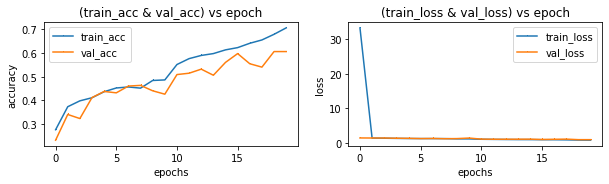

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
def plot_accuracy_loss(history):
    
    fig = plt.figure(figsize=(10,5))

    plt.subplot(221)
    #plt.plot(history.history['accuracy'],'bo--', label = "train_acc")
    plt.plot(history.history['accuracy'],marker = ',',ms = 10, label = "train_acc")
    plt.plot(history.history['val_accuracy'], marker = ',', label = "val_acc")
    plt.title("(train_acc & val_acc) vs epoch")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    plt.subplot(222)
    plt.plot(history.history['loss'],marker= ',', label = "train_loss")
    plt.plot(history.history['val_loss'], marker=',' , label = "val_loss")
    plt.title("(train_loss & val_loss) vs epoch")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    f = plt.figure()
    plt.show()
  


plot_accuracy_loss(model_history)
f = plt.figure()
#f.savefig('C:/Users/DHANVANTH/SAMSUNG/resnet_50_epoch_vs_acc', bbox_inches='tight', dpi=600)

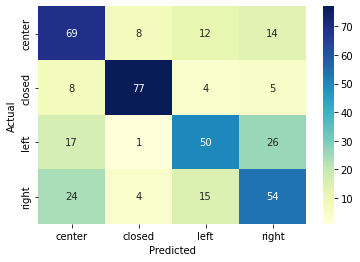

test accuracy: 64.43298969072166


In [ ]:
#to plot confusion matrix for 100 epochs
import pandas as pd
import seaborn as sn
import tensorflow as tf

#model = tf.keras.models.load_model("Reflection_dataset\Saved_Model\Mobilenet_reflection.h5")
#model = model_1
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
  X_test,Y_test = test_generator.next()
  y_prob.append(model.predict(X_test))
  y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()]for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()]for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns = ['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix,cmap="YlGnBu", annot = True,fmt='d')
plt.show()
print('test accuracy: {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

In [ ]:
# 50 epochs for Resnet50 model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

#checkpointing
#checkpoint_path = "/content/drive/MyDrive/cp-0021.ckpt.data-00000-of-00001"
#checkpoint_path = "C:/Users/DHANVANTH/SAMSUNG/Resnet/cp-0021.ckpt.data-00000-of-00001"
checkpoint_path = "/content/drive/MyDrive/cp-0021.ckpt.data-00000-of-00001"
checkpoint_dir = os.path.dirname(checkpoint_path)

#Create a callback that saves the model's weights
cp_callback = tensorflow.keras.callbacks.ModelCheckpoint(monitor ='val_accuracy',
   filepath=checkpoint_path, 
    verbose=1,
    save_weights_only=True,
    #save_freq=5*batch_size,
     save_best_only = True,                                                    
      mode='max')


#Reduce learning rate when a metric has stopped improving.
# Models often benefit 
#from reducing the learning rate by a factor of 2-10
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                              factor=0.2, patience=2, min_lr=0.00001)



# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

# Train the model with the new callback
model_history = model.fit(train_generator, epochs = 30 ,callbacks=[cp_callback, reduce_lr],
                          validation_data=valid_generator,
    validation_steps=nb_validation_samples // batch_size)
           # Pass callback to training

Epoch 1/30
97/97 [==============================] - ETA: 0s - loss: 0.7155 - accuracy: 0.6978 - mse: 0.4479
Epoch 1: val_accuracy improved from -inf to 0.63068, saving model to /content/drive/MyDrive/cp-0021.ckpt.data-00000-of-00001
97/97 [==============================] - 59s 603ms/step - loss: 0.7155 - accuracy: 0.6978 - mse: 0.4479 - val_loss: 0.8372 - val_accuracy: 0.6307 - val_mse: 0.4812 - lr: 4.0000e-05
Epoch 2/30
97/97 [==============================] - ETA: 0s - loss: 0.6917 - accuracy: 0.7196 - mse: 0.4500
Epoch 2: val_accuracy did not improve from 0.63068
97/97 [==============================] - 58s 596ms/step - loss: 0.6917 - accuracy: 0.7196 - mse: 0.4500 - val_loss: 0.8270 - val_accuracy: 0.6080 - val_mse: 0.4453 - lr: 4.0000e-05
Epoch 3/30
97/97 [==============================] - ETA: 0s - loss: 0.7322 - accuracy: 0.6978 - mse: 0.4437
Epoch 3: val_accuracy improved from 0.63068 to 0.63636, saving model to /content/drive/MyDrive/cp-0021.ckpt.data-00000-of-00001
97/97 [===

In [ ]:
model.save('/content/drive/MyDrive/models/vgg19+resnet_next30.h5')
model_1 = tensorflow.keras.models.load_model('/content/drive/MyDrive/models/vgg19+resnet_next30.h5')

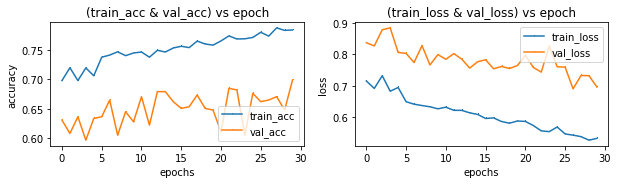

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
def plot_accuracy_loss(history):
    
    fig = plt.figure(figsize=(10,5))

    plt.subplot(221)
    #plt.plot(history.history['accuracy'],'bo--', label = "train_acc")
    plt.plot(history.history['accuracy'],marker = ',',ms = 10, label = "train_acc")
    plt.plot(history.history['val_accuracy'], marker = ',', label = "val_acc")
    plt.title("(train_acc & val_acc) vs epoch")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    plt.subplot(222)
    plt.plot(history.history['loss'],marker= ',', label = "train_loss")
    plt.plot(history.history['val_loss'], marker=',' , label = "val_loss")
    plt.title("(train_loss & val_loss) vs epoch")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    f = plt.figure()
    plt.show()
  


plot_accuracy_loss(model_history)
f = plt.figure()
#f.savefig('C:/Users/DHANVANTH/SAMSUNG/resnet_50_epoch_vs_acc', bbox_inches='tight', dpi=600)


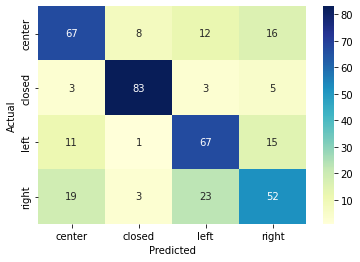

test accuracy: 69.3298969072165


In [ ]:
#to plot confusion matrix for 100 epochs
import pandas as pd
import seaborn as sn
import tensorflow as tf

#model = tf.keras.models.load_model("Reflection_dataset\Saved_Model\Mobilenet_reflection.h5")
#model = model_1
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
  X_test,Y_test = test_generator.next()
  y_prob.append(model.predict(X_test))
  y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()]for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()]for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns = ['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix,cmap="YlGnBu", annot = True,fmt='d')
plt.show()
print('test accuracy: {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))